## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# PROJECT TITLE: MICROSOFT MOVIES STUDIO ANALYSIS
## AUTHOR: PAUL MAWA MUSAU

# PROJECT OVERVIEW:
 In the recent past, there has been increased production of movies in America which has drawn attention to Microsoft company. Hence the company has decided to produce their own movies like what other rivals and companies does. Since microsoft company has no idea about movie recording and production, this report will seek to analyze data sets pertaining to movie studio creation and give insights as to why the company should utilize this available venture. This will be done by analyzing data sets provided and give more insights that will convince the stakeholders about this movie production proposal. This will be possible since the analysis will determine the best movies in the box office currently supported by visuals that gives clear picture of the current market trends in terms of movie production.

# BUSINESS PROBLEM:

##### 1.Competing with established studios: The movie industry is highly competitive, with several established studios already dominating the market. Microsoft would have to compete with these studios for talent, funding, and distribution, which could be challenging for a new player in the market.
##### 2.Lack of industry knowledge: Creating movies requires a unique set of skills and knowledge about the industry, including the creative process,   marketing, distribution, and financing. Without a team with the required experience and knowledge, Microsoft could struggle to navigate the intricacies of the movie business.
##### 3.Managing risk: The movie industry is inherently risky, with no guarantee of success for any given project. Microsoft would need to carefully manage the risk associated with investing in movies, ensuring that they make smart financial decisions and avoid over-investing in projects that may not be successful.
##### 4.Attracting talent: Creating successful movies requires a talented team of writers, directors, actors, and producers. Microsoft would need to attract top talent to its studio, which may be challenging given its lack of experience in the movie industry. It would need to offer competitive compensation packages and a compelling creative vision to attract the best talent.

![microsoft](download.jpeg)

In [3]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3 
conn = sqlite3.connect('im.db')

In [4]:
df= pd.read_csv('bom.movie_gross.csv')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
#Reading data from the database
pd.read_sql("""
    SELECT *
      FROM movie_basics;
""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#Read data from the database movie_ratings
df3 = pd.read_sql("""
    SELECT *
      FROM movie_ratings;
""",conn)
df3.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Join Movie_basics with Movie_ratings

In [7]:
df4 = pd.read_sql("""
     SELECT primary_title, start_year, genres, averagerating, numvotes
        FROM movie_basics AS MB
        JOIN movie_ratings AS MR
          ON MB.movie_id = MR.movie_id
        WHERE averagerating BETWEEN 6 AND 9
        ORDER BY numvotes DESC
        LIMIT 20;
     """,conn)
df4


,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227


In [8]:
leading_dir = ("""
      SELECT DISTINCT movie_basics.primary_title, averagerating, primary_name 
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id;     
              """)

# DATA CLEANING TMDB.MOVIES

In [9]:
# determining whether there are any null values

null_values = df3.isna().sum().sum()

if null_values == 0:
    print ('there are {} null values'. format(null_values))
else:
        print ('there are {} null values'. format(null_values))
def duplicate_values(item):
    duplicates = []
    for i in item.duplicated():
        duplicates.append(i)
    if len(set(duplicates)) == 1:
        print('there are no duplicate rows')
    else: 
        print('there are {} duplicate rows'.format(item.duplicated.value_counts().sum()))
        
duplicate_values(df3)

there are 0 null values
there are no duplicate rows


In [10]:
#determine the number of genres
pop_genre= df4['genres'].value_counts()
pop_genre

Action,Adventure,Sci-Fi       5
Adventure,Drama,Sci-Fi        2
Action,Adventure,Fantasy      2
Action,Adventure,Comedy       2
Adventure,Family,Fantasy      1
Adventure,Animation,Comedy    1
Mystery,Thriller              1
Drama,Mystery,Thriller        1
Drama,Western                 1
Biography,Crime,Drama         1
Drama,Sci-Fi,Thriller         1
Adventure,Drama,Fantasy       1
Action,Thriller               1
Name: genres, dtype: int64

### I have been able to filter the highest_rated and most_rated movies after filtering I combined the two dataframes(df4),then went ahead and checked for duplicates and null values. Then determined the movie(genres) that had the highest count.I was able to aquire the data for the top 10 movie genres.

In [11]:
grouped = df4.groupby('genres')
grouped.get_group('Action,Adventure,Sci-Fi')

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227
11,Mad Max: Fury Road,2015,"Action,Adventure,Sci-Fi",8.1,780910
15,Iron Man 3,2013,"Action,Adventure,Sci-Fi",7.2,692794


# data visualization using a bar graph

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

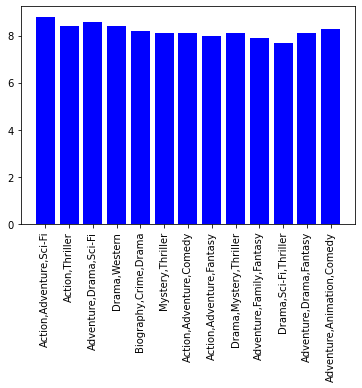

In [12]:
x = df4['genres']
y = df4['averagerating']

plt.bar(x,y, color="blue")
plt.xticks(rotation=90, fontsize=10)

In [13]:
pop_genre = pd.DataFrame(df4.groupby('genres')['numvotes'].mean()).sort_values( by = 'numvotes', ascending = False).iloc[:15]
pop_genre

,numvotes
genres,
"Action,Thriller",1387769.0
"Drama,Western",1211405.0
"Action,Adventure,Sci-Fi",1058730.4
"Biography,Crime,Drama",1035358.0
"Mystery,Thriller",1005960.0
"Adventure,Drama,Sci-Fi",989725.0
"Action,Adventure,Comedy",884620.5
"Drama,Mystery,Thriller",761592.0
"Action,Adventure,Fantasy",734022.0


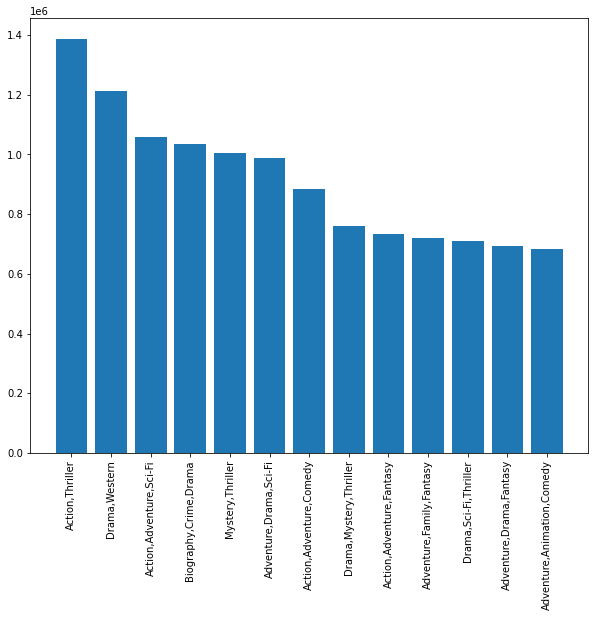

In [14]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = pop_genre["numvotes"]
plt.bar(y.index, y.values);

# DATA CLEANING TN.MOVIE_BUDGETS

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
movie_df = pd.read_csv('tn.movie_budgets.csv',index_col=0)

In [17]:
#detect NaN values
movie_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [19]:
#Detect NaN values

movie_df.isna()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
78,False,False,False,False,False
79,False,False,False,False,False
80,False,False,False,False,False


In [20]:
#determine duplicated values

movie_df.duplicated()

id
1     False
2     False
3     False
4     False
5     False
      ...  
78    False
79    False
80    False
81    False
82    False
Length: 5782, dtype: bool

In [21]:
#dropping duplicated values

movie_df.drop_duplicates(keep = 'first', inplace= True)

In [22]:
#determine the number of duplicated entries
movie_df.duplicated().value_counts()

False    5782
dtype: int64

In [23]:
movie_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
movie_df.shape

(5782, 5)

In [25]:
from datetime import datetime

In [26]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

In [27]:
movie_df.dtypes

release_date         datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
dtype: object

In [28]:
movie_df['production_budget'] = movie_df['production_budget'].str.replace('$', "").str.replace(',',"").astype(float)
movie_df['domestic_gross']= movie_df['domestic_gross'].str.replace('$', "").str.replace(',',"").astype(float)
movie_df['worldwide_gross']= movie_df['worldwide_gross'].str.replace('$', "").str.replace(',',"").astype(float)

In [29]:
movie_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [30]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


In [31]:
movie_df['return_on_inv'] = ((movie_df['domestic_gross'] + movie_df['worldwide_gross'] - movie_df['production_budget']) / movie_df['production_budget']).round(2)

In [32]:
movie_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,7.32
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.13
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.45
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.63
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,5.11


In [33]:
sorted_sample= movie_df.sort_values(by = 'return_on_inv', ascending= False,).head(20).iloc[1:20]
sorted_sample

,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,,
93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,670.34
7,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,647.07
80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,643.21
74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,582.26
14,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,541.50
10,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,518.43
47,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,431.16
16,1995-08-09,The Brothers McMullen,50000.0,10426506.0,10426506.0,416.06
66,1974-10-18,The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,378.61


# DATA CLEANING BOM.MOVIE_GROSS

In [34]:
#Read the csv file and assign a variable 'movie_gross'
movie_gross= pd.read_csv('bom.movie_gross.csv')

In [35]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [36]:
movie_gross.isna().sum()/len(movie_gross)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [37]:
movie_gross.dropna(subset = ['domestic_gross'], axis =0, inplace = True)
movie_gross.drop('foreign_gross', axis=1, inplace= True )
movie_gross.dropna(subset = ['studio'], axis = 0, inplace= True)
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [38]:
movie_gross['year']  = pd.to_datetime(movie_gross['year'])
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 131.1+ KB


# ANALYSIS FOR COMPETITION IN THE MOVIE INDUSTRY

##### I am using the movie_gross dataset to analyze the top grossing studios. I will start by grouping studio and the summed up domestic gross to determine which studio are on the top.

In [39]:
movie_gross_grouping = movie_gross.groupby('studio')['domestic_gross'].mean()

In [40]:
movie_gross_grouping

studio
3D       6.100000e+06
A23      8.210000e+04
A24      6.616208e+06
ADC      1.241000e+05
AF       3.571500e+05
             ...     
XL       2.290000e+05
YFG      1.100000e+06
Yash     2.433185e+06
Zee      1.100000e+06
Zeit.    3.539688e+05
Name: domestic_gross, Length: 255, dtype: float64

In [41]:
gross_data = pd.DataFrame(movie_gross_grouping)


In [42]:
#Assign a new variable sample to the gross_data and sort in ascending order
sample = gross_data.sort_values(by = 'domestic_gross',ascending= False).head(10)

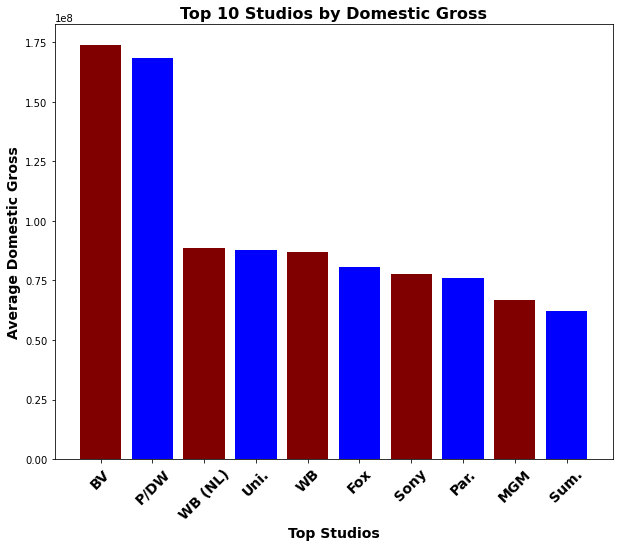

In [43]:
#Plot a bar graph with Average_domestic_gross as the Y-axis and Top_studios at the X-axis and assign it a title.
colors= ['maroon', 'blue']
plt.bar(sample['domestic_gross'].index, sample['domestic_gross'].values, color=colors, width=0.8)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.xlabel("Top Studios", fontsize=14,fontweight='bold')
plt.ylabel("Average Domestic Gross", fontsize=14, fontweight='bold')
plt.title("Top 10 Studios by Domestic Gross", fontsize=16, fontweight='bold')
plt.gcf().set_size_inches(10, 8)
plt.show()

#### Afterwards we can now plot r.o.i vs the production_budget

<AxesSubplot:xlabel='return_on_inv', ylabel='production_budget'>

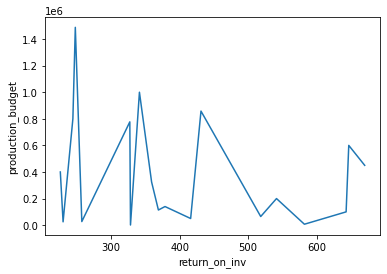

In [44]:
sns.lineplot(x='return_on_inv', y='production_budget', data=sorted_sample)

In [45]:
leading_dir = pd.read_sql ("""
      SELECT DISTINCT movie_basics.primary_title, averagerating, primary_name 
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id;     
              """, conn)


In [46]:
sorted_dir = pd.DataFrame(leading_dir.groupby('primary_name')['averagerating'].mean()).sort_values(by = 'averagerating', ascending=False)
sorted_dir.head(20)
top_directos = sorted_dir.head(10)

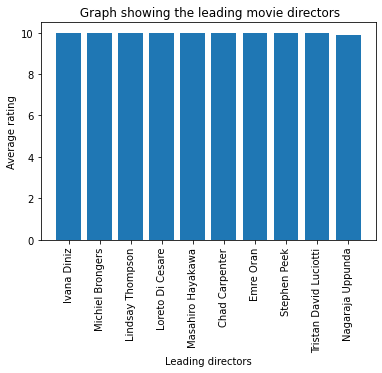

In [47]:
plt.xticks(rotation = 90)
plt.bar(top_directos["averagerating"].index, top_directos["averagerating"].values)
plt.xlabel("Leading directors")
plt.ylabel("Average rating")
plt.title(" Graph showing the leading movie directors")
plt.show()

In [48]:
top_directos = ('''SELECT primary_name, COUNT(primary_name), averagerating
FROM persons AS p
JOIN directors AS d ON p.person_id = d.person_id
JOIN movie_basics AS mb ON mb.movie_id = d.movie_id
JOIN movie_ratings AS mr ON mr.movie_id = mb.movie_id
GROUP BY primary_name, averagerating
HAVING AVG(averagerating) > 9 AND COUNT(primary_name) > 5
ORDER BY AVG(averagerating) DESC;
              ''')
pd.read_sql(top_directos, conn)


,primary_name,COUNT(primary_name),averagerating
0,Damir Radic,7,9.2
1,Fan Li,6,9.2
2,Georges Chamchoum,6,9.2
3,Nuo Wang,6,9.2
4,Yihui Ye,6,9.2
5,Chi-jan Hou,6,9.1
6,Chun-Yi Hsieh,6,9.1
7,Li Cho,6,9.1
8,Corey Lubowich,12,9.1
